資料集

雲端(資料集下載): https://drive.google.com/file/d/1_rC3wId1gbdLRSexAx1IabjgJTJ8SyUF/view?usp=sharing

資料集檔案太大，傳不上去 Moodle 平台

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 

In [20]:
# 內存優化
d_types1 = {'user_id':'int32', 'item_id':'int32', 'cat_id':'int16', 'seller_id':'int16', 'brand_id':'float32', 'time_stamp':'int16', 'action_type':'int8'}
d_types2 = {'user_id':'int32', 'age_range':'float32', 'gender':'float32'}
d_types3 = {'user_id':'int32', 'merchant_id':'int16', 'label':'float32'}

In [21]:
df_train = pd.read_csv('./dataset/train_format1.csv', dtype = d_types3)
df_test = pd.read_csv('./dataset/test_format1.csv', dtype = d_types3)
user_info = pd.read_csv('./dataset/user_info_format1.csv', dtype = d_types2)
user_log = pd.read_csv('./dataset/user_log_format1.csv', dtype = d_types1)

In [22]:
# 調整數據
user_info = user_info[:200000]
user_log = user_log[:10000000]
data_train = df_train[:100000]
data_test = df_test[:100613]

In [23]:
display(user_log.head())
display(user_info.head())
display(df_train.head())
display(df_test.head())

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,328862,323294,833,2882,2661.0,829,0
1,328862,844400,1271,2882,2661.0,829,0
2,328862,575153,1271,2882,2661.0,829,0
3,328862,996875,1271,2882,2661.0,829,0
4,328862,1086186,1271,1253,1049.0,829,0


,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0


,user_id,merchant_id,label
0,34176,3906,0.0
1,34176,121,0.0
2,34176,4356,1.0
3,34176,2217,0.0
4,230784,4818,0.0


,user_id,merchant_id,prob
0,163968,4605,NaN
1,360576,1581,NaN
2,98688,1964,NaN
3,98688,3645,NaN
4,295296,3361,NaN


## 資料前處理

##### 檢查資料類型

In [24]:
display(user_log.info())
display(user_info.info())
display(df_train.info())
display(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 7 columns):
 #   Column       Dtype  
---  ------       -----  
 0   user_id      int32  
 1   item_id      int32  
 2   cat_id       int16  
 3   seller_id    int16  
 4   brand_id     float32
 5   time_stamp   int16  
 6   action_type  int8   
dtypes: float32(1), int16(3), int32(2), int8(1)
memory usage: 181.2 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   user_id    200000 non-null  int32  
 1   age_range  199234 non-null  float32
 2   gender     197640 non-null  float32
dtypes: float32(2), int32(1)
memory usage: 2.3 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260864 entries, 0 to 260863
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      260864 non-null  int32  
 1   merchant_id  260864 non-null  int16  
 2   label        260864 non-null  float32
dtypes: float32(1), int16(1), int32(1)
memory usage: 2.5 MB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261477 entries, 0 to 261476
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      261477 non-null  int32  
 1   merchant_id  261477 non-null  int16  
 2   prob         0 non-null       float64
dtypes: float64(1), int16(1), int32(1)
memory usage: 3.5 MB


None

##### 缺失值處理

In [25]:
# NaN 當未知
# 使用 0 替換 NaN(age_range)
# 使用 2 替換 NaN(gender)

user_info['age_range'].replace(np.nan, 0, inplace = True)
user_info['gender'].replace(np.nan, 2, inplace = True)

user_info.head(132365)

,user_id,age_range,gender
0,376517,6.0,1.0
1,234512,5.0,0.0
2,344532,5.0,0.0
3,186135,5.0,0.0
4,30230,5.0,0.0
...,...,...,...
132360,355774,0.0,1.0
132361,255504,2.0,0.0
132362,188928,0.0,2.0
132363,165645,4.0,0.0


##### 視覺化

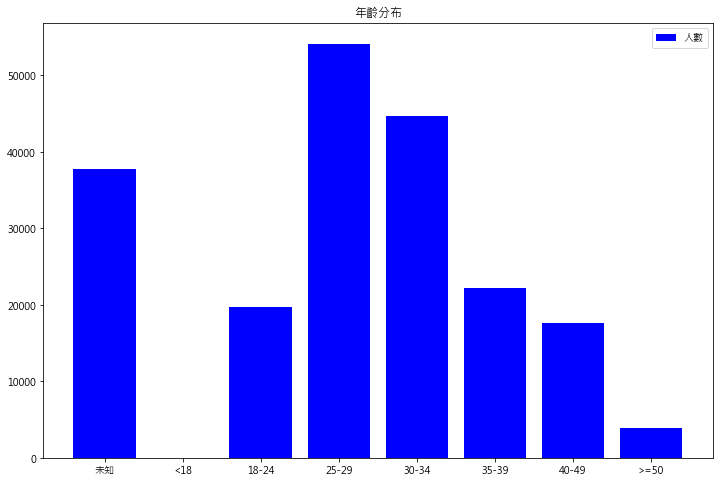

In [26]:
# 0:未知, 1:<18, 2:18-24, 3:25-29, 4:30-34, 5:35-39, 6:40-49, 7、8:>=50 
fig = plt.figure(figsize = (12, 8))

x = np.array(['未知', "<18","18-24","25-29","30-34","35-39","40-49",">=50"])
y = np.array([user_info[user_info['age_range'] == 0]['age_range'].count(),
              user_info[user_info['age_range'] == 1]['age_range'].count(),
              user_info[user_info['age_range'] == 2]['age_range'].count(),
              user_info[user_info['age_range'] == 3]['age_range'].count(),
              user_info[user_info['age_range'] == 4]['age_range'].count(),
              user_info[user_info['age_range'] == 5]['age_range'].count(),
              user_info[user_info['age_range'] == 6]['age_range'].count(),
              user_info[user_info['age_range'] == 7]['age_range'].count() + user_info[user_info['age_range'] == 8]['age_range'].count()])

plt.bar(x, y, color = 'blue')
plt.legend(['人數'])
plt.title('年齡分布')

# 儲存圖片
fig.savefig('./visualization/plot1.png',dpi=fig.dpi)

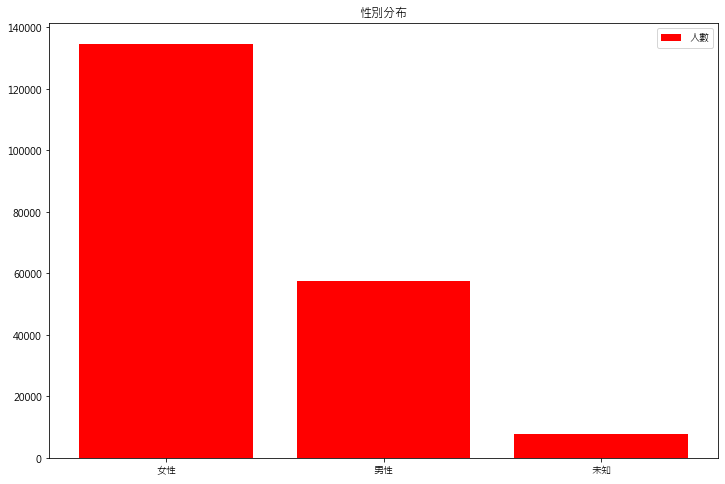

In [27]:
# 0:女性 , 1:男性 , 2、'':未知
fig = plt.figure(figsize = (12, 8))

x = np.array(['女性', '男性', '未知'])
y = np.array([user_info[user_info['gender'] == 0]['gender'].count(),
              user_info[user_info['gender'] == 1]['gender'].count(),
              user_info[user_info['gender'] == 2]['gender'].count()])

plt.bar(x, y, color = 'red')
plt.legend(['人數'])
plt.title('性別分布')

# 儲存圖片
fig.savefig('./visualization/plot2.png',dpi=fig.dpi)

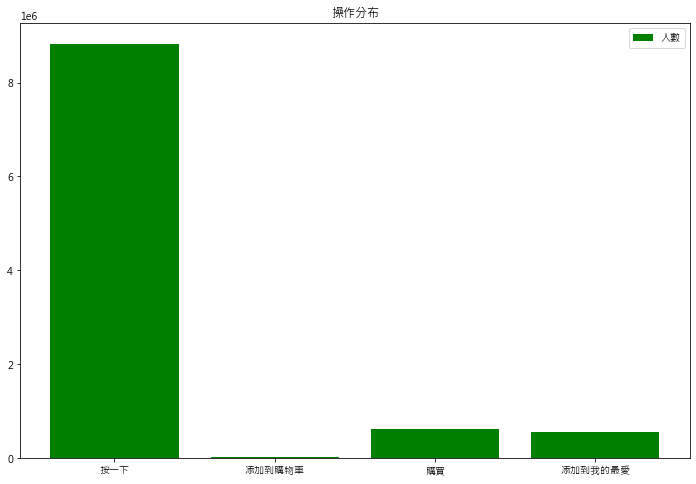

In [28]:
# 0:按一下 , 1:添加到購物車 , 2:購買, 3:添加到我的最愛
fig = plt.figure(figsize = (12, 8))

x = np.array(['按一下', '添加到購物車', '購買', '添加到我的最愛'])
y = np.array([user_log[user_log['action_type'] == 0]['action_type'].count(),
              user_log[user_log['action_type'] == 1]['action_type'].count(),
              user_log[user_log['action_type'] == 2]['action_type'].count(),
              user_log[user_log['action_type'] == 3]['action_type'].count()])

plt.bar(x, y, color = 'green')
plt.legend(['人數'])
plt.title('操作分布')

# 儲存圖片
fig.savefig('./visualization/plot3.png',dpi=fig.dpi)

## 特徵建立

建立特徵的參考網站: https://www.heywhale.com/mw/project/6044a21f6b48c2001529f1b5/content


In [29]:
# 合併 train data 和 test data
df_train["data"] = "train"
df_test["data"] = "test"
data = pd.concat([df_train, df_test])
data = data.drop(["prob"], axis = 1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 522341 entries, 0 to 261476
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      522341 non-null  int32  
 1   merchant_id  522341 non-null  int16  
 2   label        260864 non-null  float32
 3   data         522341 non-null  object 
dtypes: float32(1), int16(1), int32(1), object(1)
memory usage: 13.0+ MB


In [30]:
# 統計性別和年齡

# 合並
data = pd.merge(data, user_info)
data.head()

,user_id,merchant_id,label,data,age_range,gender
0,231552,3828,1.0,train,5.0,0.0
1,231552,2124,0.0,train,5.0,0.0
2,232320,1168,0.0,train,4.0,1.0
3,232320,4270,0.0,train,4.0,1.0
4,298368,2981,0.0,train,4.0,0.0


##### 用戶-賣家特徵(按照 user_id, merchant_id 分組)

In [31]:
# 統計交互過的商品

uniq_item_id = user_log.groupby(["user_id", "seller_id", "item_id"]).count().reset_index()[["user_id", "seller_id", "item_id"]]

uniq_item_id_count = uniq_item_id.groupby(["user_id", "seller_id"]).count().reset_index()

uniq_item_id_count.rename(columns={"seller_id":"merchant_id", "item_id":"uniq_item_id"}, inplace = True)

# 合併
data = pd.merge(data, uniq_item_id_count)
data.head()

,user_id,merchant_id,label,data,age_range,gender,uniq_item_id
0,231552,3828,1.0,train,5.0,0.0,48
1,231552,2124,0.0,train,5.0,0.0,4
2,298368,2981,0.0,train,4.0,0.0,2
3,36480,4730,0.0,train,6.0,1.0,1
4,105600,1487,0.0,train,6.0,1.0,8


In [32]:
# 統計交互過的品類

cat_id_temp = user_log.groupby(["user_id", "seller_id", "cat_id"]).count().reset_index()[["user_id", "seller_id", "cat_id"]]

cat_id_temp_count = cat_id_temp.groupby(["user_id", "seller_id"]).count().reset_index()

cat_id_temp_count.rename(columns={"seller_id":"merchant_id", "cat_id":"total_cat_id"}, inplace = True)

# 合併
data = pd.merge(data, cat_id_temp_count)
data.head()

,user_id,merchant_id,label,data,age_range,gender,uniq_item_id,total_cat_id
0,231552,3828,1.0,train,5.0,0.0,48,15
1,231552,2124,0.0,train,5.0,0.0,4,1
2,298368,2981,0.0,train,4.0,0.0,2,1
3,36480,4730,0.0,train,6.0,1.0,1,1
4,105600,1487,0.0,train,6.0,1.0,8,1


In [33]:
# 統計交互天數

time_temp = user_log.groupby(["user_id", "seller_id", "time_stamp"]).count().reset_index()[["user_id", "seller_id", "time_stamp"]]

time_temp_count = time_temp.groupby(["user_id", "seller_id"]).count().reset_index()

time_temp_count.rename(columns={"seller_id":"merchant_id", "time_stamp":"total_time_temp"}, inplace = True)

# 合併
data = pd.merge(data, time_temp_count)
data.head()

,user_id,merchant_id,label,data,age_range,gender,uniq_item_id,total_cat_id,total_time_temp
0,231552,3828,1.0,train,5.0,0.0,48,15,3
1,231552,2124,0.0,train,5.0,0.0,4,1,1
2,298368,2981,0.0,train,4.0,0.0,2,1,3
3,36480,4730,0.0,train,6.0,1.0,1,1,1
4,105600,1487,0.0,train,6.0,1.0,8,1,3


In [34]:
# 統計點擊、添加購物車、購買、添加到我的最愛的操作次數

click_temp = user_log.groupby(["user_id", "seller_id", "action_type"])["item_id"].count().reset_index()

click_temp.rename(columns={"seller_id":"merchant_id", "item_id":"times"}, inplace = True)

click_temp["clicks"] = click_temp["action_type"] == 0

click_temp["clicks"] = click_temp["clicks"] * click_temp["times"]

click_temp["shopping_cart"] = click_temp["action_type"] == 1
click_temp["shopping_cart"] = click_temp["shopping_cart"] * click_temp["times"]

click_temp["purchases"] = click_temp["action_type"] == 2
click_temp["purchases"] = click_temp["purchases"] * click_temp["times"]

click_temp["favourites"] = click_temp["action_type"] == 3
click_temp["favourites"] = click_temp["favourites"] * click_temp["times"]

features = click_temp.groupby(["user_id", "merchant_id"]).sum().reset_index()

features = features.drop(["action_type", "times"], axis = 1)

# 合併
data = pd.merge(data, features)
data.head()

,user_id,merchant_id,label,data,age_range,gender,uniq_item_id,total_cat_id,total_time_temp,clicks,shopping_cart,purchases,favourites
0,231552,3828,1.0,train,5.0,0.0,48,15,3,78,0,5,0
1,231552,2124,0.0,train,5.0,0.0,4,1,1,6,0,1,0
2,298368,2981,0.0,train,4.0,0.0,2,1,3,4,0,1,0
3,36480,4730,0.0,train,6.0,1.0,1,1,1,2,0,1,0
4,105600,1487,0.0,train,6.0,1.0,8,1,3,20,0,1,0


In [35]:
# 購買點擊率
data["purchases_ctr"] = data["purchases"] / data["clicks"]
data.head()

,user_id,merchant_id,label,data,age_range,gender,uniq_item_id,total_cat_id,total_time_temp,clicks,shopping_cart,purchases,favourites,purchases_ctr
0,231552,3828,1.0,train,5.0,0.0,48,15,3,78,0,5,0,0.064103
1,231552,2124,0.0,train,5.0,0.0,4,1,1,6,0,1,0,0.166667
2,298368,2981,0.0,train,4.0,0.0,2,1,3,4,0,1,0,0.250000
3,36480,4730,0.0,train,6.0,1.0,1,1,1,2,0,1,0,0.500000
4,105600,1487,0.0,train,6.0,1.0,8,1,3,20,0,1,0,0.050000


In [45]:
# 儲存提取好的特徵
data.to_csv("./dataset/features.csv", index = False)

## 預測建模

In [60]:
new_data = pd.read_csv('./dataset/features.csv')

### 預處理

In [61]:
# 壓縮資料
fcols = new_data.select_dtypes('float').columns
icols = new_data.select_dtypes('integer').columns
new_data[fcols] = new_data[fcols].apply(pd.to_numeric, downcast='float')
new_data[icols] = new_data[icols].apply(pd.to_numeric, downcast='integer')

new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47511 entries, 0 to 47510
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   user_id          47511 non-null  int32  
 1   merchant_id      47511 non-null  int16  
 2   label            23687 non-null  float32
 3   data             47511 non-null  object 
 4   age_range        47511 non-null  float32
 5   gender           47511 non-null  float32
 6   uniq_item_id     47511 non-null  int16  
 7   total_cat_id     47511 non-null  int8   
 8   total_time_temp  47511 non-null  int8   
 9   clicks           47511 non-null  int16  
 10  shopping_cart    47511 non-null  int8   
 11  purchases        47511 non-null  int8   
 12  favourites       47511 non-null  int8   
 13  purchases_ctr    47511 non-null  float32
dtypes: float32(4), int16(3), int32(1), int8(5), object(1)
memory usage: 1.8+ MB


In [62]:
# 分成訓練集和測試集
train = new_data[new_data["data"] == "train"]
test = new_data[new_data["data"] == "test"].drop(["data", "label"], axis = 1)

In [63]:
# 預測的測試集
pre_test = test.drop(['user_id', 'merchant_id'], axis = 1)

# 無限值替換成0
pre_test.replace([np.inf, -np.inf], 0, inplace = True)

In [64]:
X, y = train.drop(["user_id", "merchant_id", "label", 'data'], axis = 1), train["label"]

# 無限值替換成0
X.replace([np.inf, -np.inf], 0, inplace = True)

In [65]:
# 分成訓練集和驗證集
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2)

In [99]:
# 正樣本比例
print("訓練集正樣本比例: ", y_train.mean())
print("驗證集正樣本比例: ", y_valid.mean())

訓練集正樣本比例:  0.06406670808792114
驗證集正樣本比例:  0.06585057079792023


### 模型

In [67]:
from sklearn.metrics import roc_auc_score

##### 隨機森林(RandomForest)

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [70]:
print('accuracy: ', rf.score(X_valid, y_valid))
print('roc_auccuracy: ', roc_auc_score(y_valid, rf.predict_proba(X_valid)[:, 1]))

accuracy:  0.9267623469818489
roc_auccuracy:  0.5800376852398994


In [71]:
# 最佳參數建立模型(參考 找出最佳模型參數.ipynb)

best_rf = RandomForestClassifier(max_depth = 5, min_samples_leaf = 50, min_samples_split = 2, n_estimators = 50)
best_rf.fit(X_train, y_train)

print('accuracy: ', best_rf.score(X_valid, y_valid))
print('roc_auccuracy: ', roc_auc_score(y_valid, best_rf.predict_proba(X_valid)[:, 1]))

accuracy:  0.9341494301392993
roc_auccuracy:  0.6250695192742188


<AxesSubplot:>

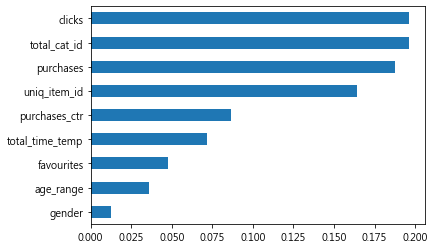

In [72]:
# 前十名特徵
features = pd.Series(best_rf.feature_importances_, index = X_train.columns).sort_values()
features[-9:].plot.barh()

In [73]:
# 預測
rf_predict_proba = best_rf.predict_proba(pre_test)
print(rf_predict_proba[:, 1])

[0.14018466 0.03905933 0.04300034 ... 0.05981523 0.10843867 0.04628423]


##### 邏輯迴歸(LogisticRegression)

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
lg =  LogisticRegression()
lg.fit(X_train, y_train)

c:\Users\s3895\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [76]:
print('accuracy: ', lg.score(X_valid, y_valid))
print('roc_auccuracy: ', roc_auc_score(y_valid, lg.predict_proba(X_valid)[:, 1]))

accuracy:  0.933938370620515
roc_auccuracy:  0.6291950537036394


In [77]:
# 最佳參數建立模型(參考 找出最佳模型參數.ipynb)

best_lg =  LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
best_lg.fit(X_train, y_train)

print('accuracy: ', best_lg.score(X_valid, y_valid))
print('roc_auccuracy: ', roc_auc_score(y_valid, best_lg.predict_proba(X_valid)[:, 1]))

accuracy:  0.933938370620515
roc_auccuracy:  0.6310184863336694


In [78]:
# 預測
lg_predict_proba = best_lg.predict_proba(pre_test)
print(lg_predict_proba[:, 1])

[0.106764   0.04854479 0.04782225 ... 0.05420906 0.08360119 0.05397805]


##### XGBoost

In [79]:
from xgboost import XGBClassifier

In [80]:
xgc = XGBClassifier()
xgc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [81]:
print('accuracy: ', xgc.score(X_valid, y_valid))
print('roc_auccuracy: ', roc_auc_score(y_valid, xgc.predict_proba(X_valid)[:, 1]))

accuracy:  0.931827775432672
roc_auccuracy:  0.5658930474932509


In [82]:
# 最佳參數建立模型(參考 找出最佳模型參數.ipynb)

best_xgc = XGBClassifier(eta = 0.1, eval_metric = 'auc', gamma = 1, max_depth = 1, min_child_weight = 10, objective = 'binary:logistic', subsample = 0.5)
best_xgc.fit(X_train, y_train)

print('accuracy: ', best_xgc.score(X_valid, y_valid))
print('roc_auccuracy: ', roc_auc_score(y_valid, best_xgc.predict_proba(X_valid)[:, 1]))

accuracy:  0.9341494301392993
roc_auccuracy:  0.6351060024100015


<AxesSubplot:>

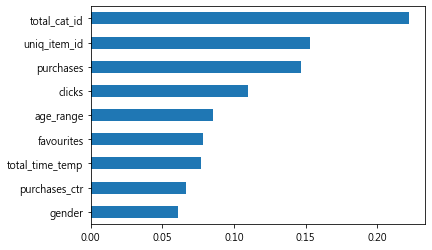

In [83]:
# 前十名特徵
features = pd.Series(best_xgc.feature_importances_, index = X_train.columns).sort_values()
features[-9:].plot.barh()

In [84]:
# 預測
xgc_predict_proba = best_xgc.predict_proba(pre_test)
print(xgc_predict_proba[:, 1])

[0.13956194 0.04013466 0.04306442 ... 0.05355697 0.11596434 0.04489125]


##### LightGBM

In [85]:
from lightgbm import LGBMClassifier

In [86]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

LGBMClassifier()

In [87]:
print('accuracy: ', lgbm.score(X_valid, y_valid))
print('roc_auccuracy: ', roc_auc_score(y_valid, lgbm.predict_proba(X_valid)[:, 1]))

accuracy:  0.9333051920641621
roc_auccuracy:  0.6035761149153602


In [88]:
# 最佳參數建立模型(參考 找出最佳模型參數.ipynb)

best_lgbm =  LGBMClassifier(boosting_type = 'goss', learning_rate = 0.05, max_depth = 50, min_split_gain = 0.05, num_leaves = 10, subsample = 0.5)
best_lgbm.fit(X_train, y_train)

print('accuracy: ', best_lgbm.score(X_valid, y_valid))
print('roc_auccuracy: ', roc_auc_score(y_valid, best_lgbm.predict_proba(X_valid)[:, 1]))

accuracy:  0.933938370620515
roc_auccuracy:  0.6264135585757817


<AxesSubplot:>

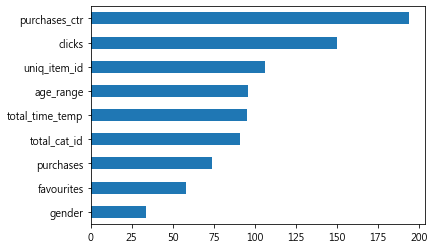

In [89]:
# 前十名特徵
features = pd.Series(best_lgbm.feature_importances_, index = X_train.columns).sort_values()
features[-9:].plot.barh()

In [90]:
# 預測
predict_proba = best_lgbm.predict_proba(pre_test)
print(predict_proba[:, 1])

[0.18412563 0.03695853 0.03963696 ... 0.05788233 0.07053116 0.04375424]


## 選擇最佳模型

In [91]:
# 沒調過任何參數
auc_lg = roc_auc_score(y_valid, lg.predict_proba(X_valid)[:,1])
auc_rf =  roc_auc_score(y_valid, rf.predict_proba(X_valid)[:,1])
auc_xgc = roc_auc_score(y_valid, xgc.predict_proba(X_valid)[:,1])
auc_lgbm = roc_auc_score(y_valid, lgbm.predict_proba(X_valid)[:,1])

In [92]:
# 比較模型的準確率
scores = pd.DataFrame({ "model":["LogisticRegression","RandomForest","XGBoost", "LightGBM"],
                        "auc":[auc_lg, auc_rf, auc_xgc, auc_lgbm]})

scores.sort_values(by="auc", ascending = False)

,model,auc
0,LogisticRegression,0.629195
3,LightGBM,0.603576
1,RandomForest,0.580038
2,XGBoost,0.565893


In [93]:
# 調過最佳參數
best_auc_lg = roc_auc_score(y_valid, best_lg.predict_proba(X_valid)[:,1])
best_auc_rf =  roc_auc_score(y_valid, best_rf.predict_proba(X_valid)[:,1])
best_auc_xgc = roc_auc_score(y_valid, best_xgc.predict_proba(X_valid)[:,1])
best_auc_lgbm = roc_auc_score(y_valid, best_lgbm.predict_proba(X_valid)[:,1])

In [94]:
# 比較模型的準確率
scores = pd.DataFrame({ "model":["LogisticRegression","RandomForest","XGBoost", "LightGBM"],
                        "auc":[best_auc_lg, best_auc_rf, best_auc_xgc, best_auc_lgbm]})

scores.sort_values(by="auc", ascending = False)

,model,auc
2,XGBoost,0.635106
0,LogisticRegression,0.631018
3,LightGBM,0.626414
1,RandomForest,0.625070


In [96]:
# 儲存最佳模型預測結果
list1 = []
for i in xgc_predict_proba[:, 1]:
    list1.append(i)
xgc_prob = pd.DataFrame({'prob':list1})
xgc_prob.to_csv('result.csv', index = False)

## 參考資料

1.資料集

官方: https://tianchi.aliyun.com/competition/entrance/231576/information

2.用戶的復購預測

https://www.heywhale.com/mw/project/6044a21f6b48c2001529f1b5/content
